In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("Customer_Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(['customerID'] , axis = 'columns' , inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values  # need to convert to number 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df['TotalCharges']) ## spaces issue in values 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2369, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string " "

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pranj\Desktop\codebasics\Deep learning\dl_tf\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pranj\AppData\Local\Temp\ipykernel_12612\3158166273.py", line 1, in <module>
    pd.to_numeric(df['TotalCharges']) ## spaces issue in values
  File "C:\Users\pranj\Desktop\codebasics\Deep learning\dl_tf\lib\site-packages\pandas\core\tools\numeric.py", line 185, in to_numeric
    values, _ = lib.maybe_convert_numeric(
  File "pandas\_libs\lib.pyx", line 2411, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string " " at position 488

During handling of the above exception, another exception occurred:



In [11]:
pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
###  errors = 'coerce' , ingore error and to the conversion 

In [13]:
pd.to_numeric(df['TotalCharges'] , errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[pd.to_numeric(df['TotalCharges'] , errors = 'coerce').isnull()] ### empty rows for TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.shape

(7043, 21)

In [8]:
df[pd.to_numeric(df['TotalCharges'] , errors = 'coerce').isnull()] .shape

(11, 21)

In [9]:
#drop 11 rows out of 7043

In [10]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df1 = df[df['TotalCharges'] != ' ']

In [13]:
df1.shape

(7032, 21)

In [14]:
pd.to_numeric(df1['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [15]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

C:\Users\pranj\AppData\Local\Temp\ipykernel_22736\1462773625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [17]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df1.TotalCharges.dtypes

dtype('float64')

In [19]:
### visualization 

In [20]:
df1[df1['Churn'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [29]:
### not leaving then what is tenure 

In [30]:
df1[df1['Churn'] == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [31]:
tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

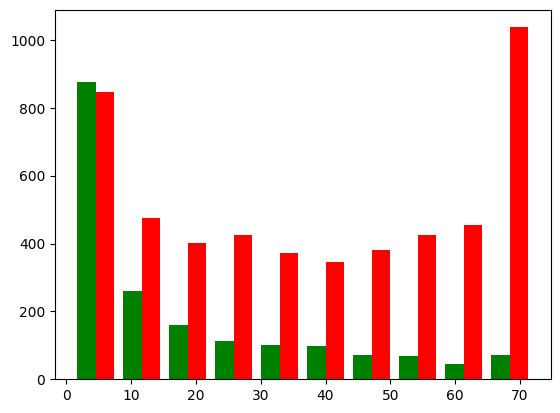

In [32]:
plt.hist([tenure_churn_yes , tenure_churn_no ] , color = ['green' , 'red'])

Text(0.5, 1.0, 'customer churn Prediction')

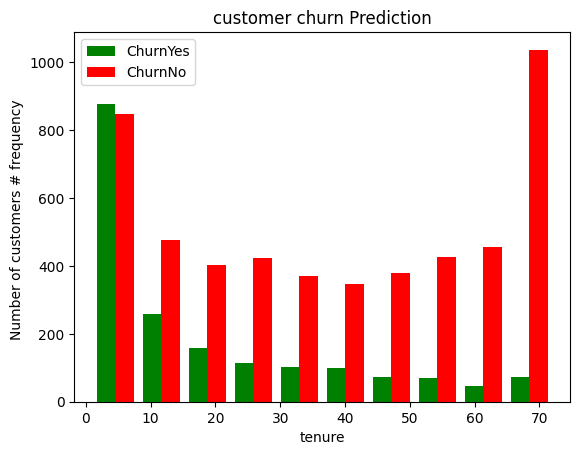

In [33]:
plt.hist([tenure_churn_yes , tenure_churn_no ] , color = ['green' , 'red'] , label = ['ChurnYes' , 'ChurnNo'])
plt.legend()

plt.xlabel('tenure')
plt.ylabel('Number of customers # frequency ')
plt.title("customer churn Prediction")

In [34]:
monthly_charges_churn_yes = df1[df1["Churn"] == "Yes"].MonthlyCharges
monthly_charges_churn_no = df1[df1["Churn"] == "No"].MonthlyCharges

In [35]:
monthly_charges_churn_no

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

Text(0.5, 1.0, 'Churn vs Monthly Charges')

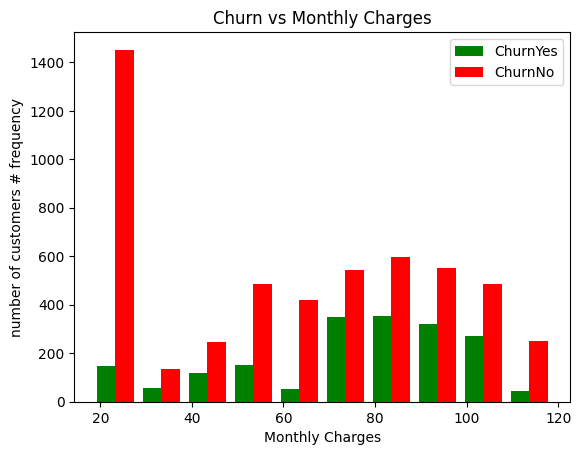

In [36]:
plt.hist([ monthly_charges_churn_yes , monthly_charges_churn_no] , color = ['green' , 'red'] , label = ['ChurnYes' , 'ChurnNo'])

plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel("number of customers # frequency")
plt.title("Churn vs Monthly Charges")

In [37]:
### label encoding in columns having just 0,1 

In [38]:
for col in df:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [21]:
def print_unique_values_cols():

    for col in df1:
        if df1[col].dtypes == 'object':
            print(f'{col} : {df1[col].unique()}')

In [22]:
print_unique_values_cols()

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
df1.replace('No phone service' ,'No' , inplace= True )
df1.replace('No internet service' ,'No' , inplace= True )


C:\Users\pranj\AppData\Local\Temp\ipykernel_22736\1199448289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' ,'No' , inplace= True )
C:\Users\pranj\AppData\Local\Temp\ipykernel_22736\1199448289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' ,'No' , inplace= True )


In [24]:
print_unique_values_cols()

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\pranj\AppData\Local\Temp\ipykernel_22736\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [26]:
print_unique_values_cols()

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
df1['DeviceProtection'].unique()

array([0, 1], dtype=int64)

In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\pranj\AppData\Local\Temp\ipykernel_22736\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [29]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [30]:
pd.get_dummies(data =df1 , columns=['InternetService'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [31]:
df2 = pd.get_dummies(data =df1 , columns=['Contract' , 'PaymentMethod' , 'InternetService' ])

In [32]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,0,1,0,0,0,0,1,1,0,0
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [33]:
df2.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
224,5961-VUSRV,1,0,0,0,12,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4335,9208-OLGAQ,1,1,0,0,18,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1123,0074-HDKDG,0,0,1,1,25,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
5344,6283-GITPX,0,0,0,1,71,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0


In [34]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year              

In [35]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'] , errors = 'coerce')  

In [36]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year              

In [37]:
### scaling 

In [38]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [39]:
from sklearn.preprocessing import MinMaxScaler 
scalar = MinMaxScaler()

df2[cols_to_scale] = scalar.fit_transform(df2[cols_to_scale])

In [40]:
df2.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
143,2636-SJDOU,0,0,0,0,0.887324,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
1282,6260-ONULR,0,0,0,0,0.000000,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
5376,9229-RQABD,0,0,0,0,0.239437,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [41]:
clean_data = df2.to_csv('clean_data_customer_churn.csv', index=False)

In [42]:
df_clean = pd.read_csv('clean_data_customer_churn.csv')

In [67]:
df_clean = df_clean.drop(['customerID'] ,  axis ='columns')

In [68]:
x = df_clean.drop(['Churn'] , axis = 'columns')
y = df_clean['Churn']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 15)

In [71]:
x_train.shape

(5625, 26)

In [72]:
x_test.shape

(1407, 26)

In [73]:
x_train[: 10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1995,1,1,0,0,0.112676,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4528,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5013,1,0,1,1,0.309859,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1643,0,1,1,1,0.830986,1,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2105,1,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
5637,0,0,0,1,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2535,1,0,0,0,0.971831,1,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
3515,1,0,1,1,0.788732,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
6498,1,0,1,1,0.802817,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1612,0,0,0,0,0.366197,1,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [74]:
len(x_train.columns)

26

In [75]:
model = keras.Sequential([
    keras.layers.Dense(26 , input_shape = (26,) , activation = 'relu') , # input_layer 
    #keras.layers.Dense(15 , activation = 'relu') ,  # input_shape = (26,) acting as an  hidden layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [76]:
model.compile(optimizer = 'adam' ,
             loss = 'binary_crossentropy' ,
             metrics = ['accuracy'])

In [79]:
model.fit(x_train , y_train , epochs = 10)

Epoch 1/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8053
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8055
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8036
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8064
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8030
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8091
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8098
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8089
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8075
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8092

In [80]:
model.evaluate(x_test , y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8145


[0.4197145700454712, 0.8144989609718323]

In [81]:
y_pred = model.predict(x_test)


44/44 [==============================] - 0s 2ms/step


In [82]:
y_pred

array([[0.01958515],
       [0.12735477],
       [0.11632995],
       ...,
       [0.45702106],
       [0.02386934],
       [0.2625302 ]], dtype=float32)

In [83]:
y_test

9       0
2453    0
3480    0
1954    0
2854    0
       ..
5092    1
4353    0
4540    1
3051    0
5781    0
Name: Churn, Length: 1407, dtype: int64

In [84]:
y_pred_class = []

for val in y_pred:
    if val > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [86]:
y_pred_class[:5]

[0, 0, 0, 0, 0]

In [95]:
from sklearn.metrics import confusion_matrix , classification_report 
print(classification_report(y_test , y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1040
           1       0.68      0.54      0.60       367

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.81      0.81      1407



In [88]:
confusion_matrix(y_test , y_pred_class)

array([[949,  91],
       [170, 197]], dtype=int64)

In [91]:
accuracy = ( 949 + 197 ) / (949  + 91 + 170 + 197 ) 
accuracy

0.814498933901919

In [92]:
# precision for 0 , meaning of all predictions we made for 0 how many were actually zero 

In [94]:
precision  = 949 / (949 + 170 )
precision

0.8480786416443253

In [99]:
round(precision , 2)

0.85

In [96]:
# precision for 1 , of all 1 we predicted how many were actually one 

In [98]:
precison_1  = 197 / (197 + 91 )
precison_1

0.6840277777777778

In [100]:
# recall for 0 means 0 we predicted against total numbers of actual 0 in data . i.e. jhow many 0 were we able to detect 

In [103]:
recal_0 = 949/ (949 + 91 )
recal_0

0.9125

In [104]:
recal_1 = 197 / ( 170 + 197 )

In [105]:
recal_1

0.5367847411444142

In [106]:
round(recal_1 , 2)

0.54